In [ ]:
pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical, plot_model

import matplotlib.pyplot as plt
import numpy as np

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print("Train Boyutu", x_train.shape, y_train.shape)

Train Boyutu (60000, 28, 28) (60000,)


In [ ]:
print("Test Boyutu", x_test.shape, y_test.shape)

Test Boyutu (10000, 28, 28) (10000,)


In [ ]:
num_labels=len(np.unique(y_train))

In [ ]:
num_labels

10

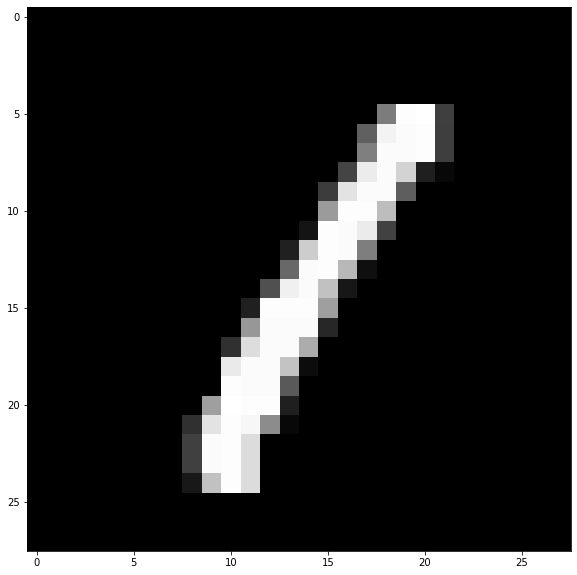

In [ ]:
# Veri Setinden Ornekler Gosterilmesi

plt.figure(figsize=(10,10))
plt.imshow(x_train[3], cmap="gray");

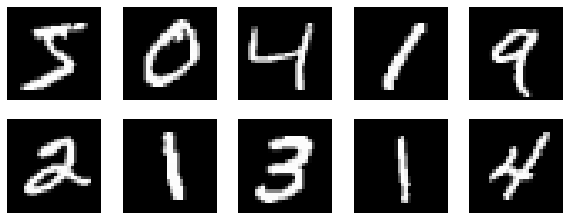

In [ ]:
plt.figure(figsize=(10,10))
for n in range(10):
  ax=plt.subplot(5,5,n+1)
  plt.imshow(x_train[n], cmap="gray");
  plt.axis("off")

In [ ]:
def visualize_img(data):
  plt.figure(figsize=(10,10))
  for n in range(10):
    ax=plt.subplot(5,5,n+1)
    plt.imshow(data[n], cmap="gray");
    plt.axis("off")

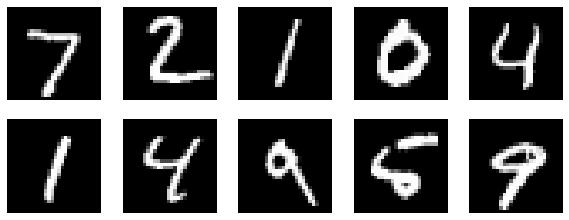

In [ ]:
visualize_img(x_test)

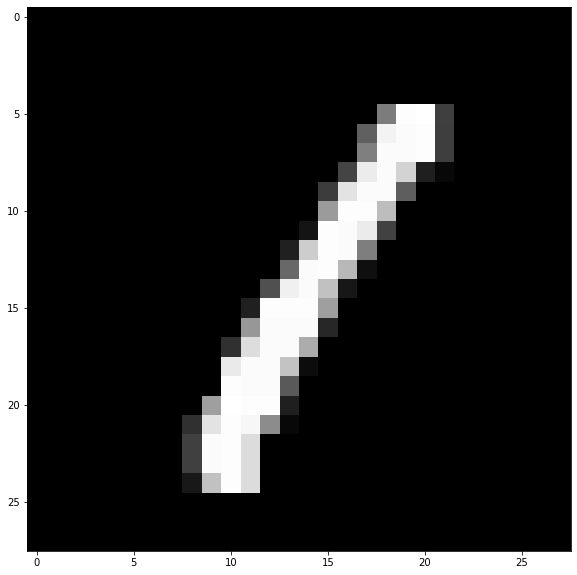

In [ ]:
plt.figure(figsize=(10,10))
plt.imshow(x_train[3], cmap="gray");

In [ ]:
# RGB

In [ ]:
x_train[3]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0, 124, 253, 255,  63,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
x_train[3].shape

(28, 28)

In [ ]:
x_train[3][10,10]

0

In [ ]:
x_train[3][22,10]

253

In [ ]:
x_train[3].mean()

21.855867346938776

In [ ]:
x_train[3].sum()

17135

In [ ]:
x_train[3][14:20,10:20]

array([[  0,   0,  80, 240, 251, 193,  23,   0,   0,   0],
       [  0,  32, 253, 253, 253, 159,   0,   0,   0,   0],
       [  0, 151, 251, 251, 251,  39,   0,   0,   0,   0],
       [ 48, 221, 251, 251, 172,   0,   0,   0,   0,   0],
       [234, 251, 251, 196,  12,   0,   0,   0,   0,   0],
       [253, 251, 251,  89,   0,   0,   0,   0,   0,   0]], dtype=uint8)

In [ ]:
x_train[3][14:20,10:20].mean()

90.18333333333334

In [ ]:
def pixel_visualize(img):
  fig = plt.figure(figsize=(12,12))
  ax = fig.add_subplot(111)
  ax.imshow(img, cmap="gray")
  width, height = img.shape

  threshold =  img.max() / 2.5
  
  for x in range(width):
    for y in range(height):

        ax.annotate(str(round(img[x][y], 2)), xy=(y, x), color ="white" if img[x][y]<threshold else "black")


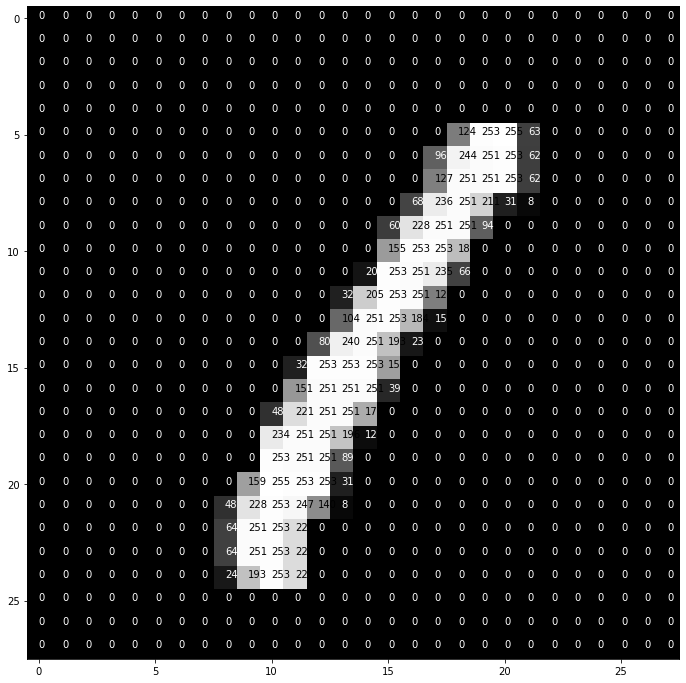

In [ ]:
pixel_visualize(x_train[3])

## Encoding

[0 1 2 3 4 5 6 7 8 9]

[0 1 0 0 0 0 0 0 0 0]


In [ ]:
y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [ ]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [ ]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## Reshaping

In [ ]:
image_size = x_train[1].shape

In [ ]:
image_size

(28, 28)

In [ ]:
print("Train Boyutu", x_train.shape)
print("Test Boyutu", x_test.shape)

Train Boyutu (60000, 28, 28)
Test Boyutu (10000, 28, 28)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

print("Train Boyutu", x_train.shape)
print("Test Boyutu", x_test.shape)

Train Boyutu (60000, 28, 28, 1)
Test Boyutu (10000, 28, 28, 1)


## Standardization

In [ ]:
x_train = x_train.astype("float32") /255
x_test = x_test.astype("float32") /255

## Modelling

In [ ]:
## Sinir Ağı Mimarisini Tanımlamak

In [ ]:
model = tf.keras.Sequential(
    [
        Flatten(input_shape=(28, 28, 1)),
        Dense(units=128, activation="relu", name="layer"),
        Dense(units=num_labels, activation="softmax", name="output_layer")
    ]
)
model.compile(loss="categorical_crossentropy",
              optimizer="adam",
              metrics=[tf.keras.metrics.Precision(), tf.keras.metrics.Recall(),"accuracy"])


# 128 feature cıkartmıs olduk

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer (Dense)               (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 4s 9ms/step - loss: 0.0618 - precision: 0.9853 - recall: 0.9795 - accuracy: 0.9821 - val_loss: 0.0830 - val_precision: 0.9798 - val_recall: 0.9731 - val_accuracy: 0.9758
Epoch 2/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0518 - precision: 0.9876 - recall: 0.9826 - accuracy: 0.9850 - val_loss: 0.0817 - val_precision: 0.9793 - val_recall: 0.9737 - val_accuracy: 0.9765
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0428 - precision: 0.9898 - recall: 0.9859 - accuracy: 0.9877 - val_loss: 0.0772 - val_precision: 0.9803 - val_recall: 0.9751 - val_accuracy: 0.9769
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0370 - precision: 0.9916 - recall: 0.9882 - accuracy: 0.9897 - val_loss: 0.0748 - val_precision: 0.9809 - val_recall: 0.9763 - val_accuracy: 0.9775
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0315 - precision: 0.9928 - r

In [ ]:
#loss düsük geldi iyi 5 epoch ile birlikte.
# accuracy degeri yükseldi iyi bir sey

## Evaluation

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/10
469/469 [==============================] - 3s 7ms/step - loss: 0.0111 - precision: 0.9983 - recall: 0.9978 - accuracy: 0.9980 - val_loss: 0.0759 - val_precision: 0.9805 - val_recall: 0.9786 - val_accuracy: 0.9793
Epoch 2/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0105 - precision: 0.9982 - recall: 0.9976 - accuracy: 0.9979 - val_loss: 0.0860 - val_precision: 0.9785 - val_recall: 0.9758 - val_accuracy: 0.9765
Epoch 3/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0103 - precision: 0.9980 - recall: 0.9975 - accuracy: 0.9978 - val_loss: 0.0828 - val_precision: 0.9787 - val_recall: 0.9760 - val_accuracy: 0.9774
Epoch 4/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0085 - precision: 0.9984 - recall: 0.9982 - accuracy: 0.9983 - val_loss: 0.0769 - val_precision: 0.9809 - val_recall: 0.9790 - val_accuracy: 0.9799
Epoch 5/10
469/469 [==============================] - 3s 6ms/step - loss: 0.0068 - precision: 0.9989 - r

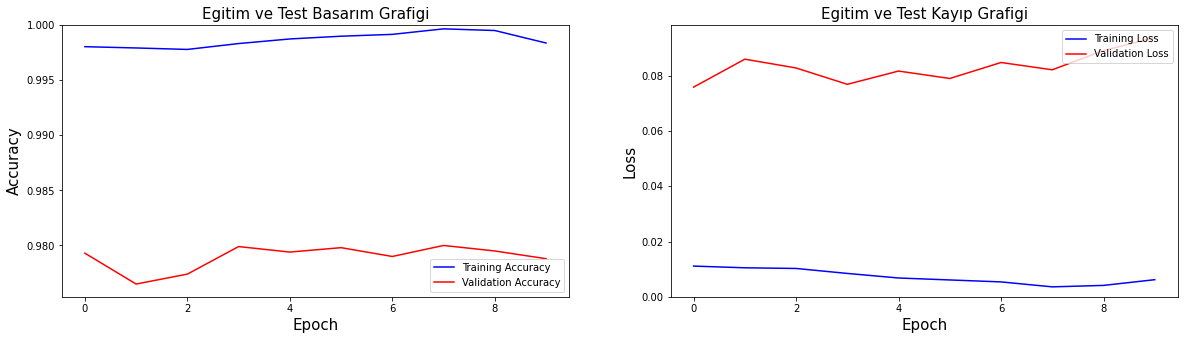

In [ ]:
# accuracy
plt.figure(figsize=(20, 5))
plt.subplot(1, 2 ,1)
plt.plot(history.history["accuracy"], color="b", label="Training Accuracy")
plt.plot(history.history["val_accuracy"], color="r", label="Validation Accuracy")
plt.legend(loc="lower right")
plt.xlabel("Epoch",fontsize=15)
plt.ylabel("Accuracy",fontsize=15)
plt.ylim([min(plt.ylim()),1])
plt.title("Egitim ve Test Basarım Grafigi", fontsize=15)

# Loss 

plt.subplot(1, 2 ,2)
plt.plot(history.history["loss"], color="b", label="Training Loss")
plt.plot(history.history["val_loss"], color="r", label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=15)
plt.ylabel("Loss",fontsize=15)
plt.ylim([0, max(plt.ylim())])
plt.title("Egitim ve Test Kayıp Grafigi", fontsize=15)
plt.show()

In [ ]:
loss,precision,recall,acc =model.evaluate(x_test,y_test,verbose=False)
print("Test Acc %.1f%%" % (100.0*acc))
print("Test Loss %.1f%%" % (100.0*loss))
print("Test precision %.1f%%" % (100.0*precision))
print("Test recall %.1f%%" % (100.0*recall))


Test Acc 97.9%
Test Loss 9.4%
Test precision 97.9%
Test recall 97.9%


In [ ]:
## acc precision recall aynı veya yakın olduğunda sınıflar arasında dengesizlik olmuyor
## precision tahmin degerinin gercekte ne kadar basarılı oldugu
## recall gercek degerlerin kac tanesini dogru tahmin ettigimize bakmıs oluyoruz

## model kayıt etme ve tahmin için kullanılması

In [ ]:
model.save("mnist_model.h5")

In [ ]:
import random 

random = random.randint(0, x_test.shape[0])

In [ ]:
random

9103

In [ ]:
test_image = x_test[random]

In [ ]:
y_test[random]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

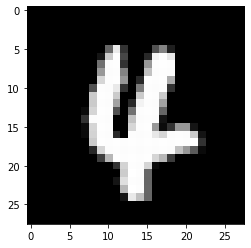

In [ ]:
plt.imshow(test_image.reshape(28,28), cmap="gray");

In [ ]:
test_data = x_test[random].reshape(1,28,28,1)

In [ ]:
probability = model.predict(test_data)

1/1 [==============================] - 0s 271ms/step


In [ ]:
probability

array([[4.1563197e-08, 7.7452341e-12, 8.4625205e-09, 8.2118568e-10,
        9.9985981e-01, 1.5509530e-09, 2.1760034e-07, 1.3972018e-04,
        6.8282330e-10, 1.8918142e-07]], dtype=float32)

In [ ]:
predicted_classes = np.argmax(probability)

In [ ]:
predicted_classes

4

In [ ]:
print(f"Tahmin edilen Sınıf: {predicted_classes} \n")
print(f"Tahmin edilen Sınıfın Olasılık Değeri: {(np.max(probability, axis=-1))[0]} \n")
print(f"Diğer Sınıfların Olasılık Değerleri: {probability}")

Tahmin edilen Sınıf: 4 

Tahmin edilen Sınıfın Olasılık Değeri: 0.9998598098754883 

Diğer Sınıfların Olasılık Değerleri: [[4.1563197e-08 7.7452341e-12 8.4625205e-09 8.2118568e-10 9.9985981e-01
  1.5509530e-09 2.1760034e-07 1.3972018e-04 6.8282330e-10 1.8918142e-07]]
